# Iman Kianian - First Assignment of ML Course - Fall 2021

In [112]:
import warnings
warnings.filterwarnings('ignore')

#### Import Libraries

In [113]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics,svm
from sklearn.model_selection import cross_val_score,KFold
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.multiclass import OneVsRestClassifier

#### Import Data And a bit Preprocessing


In [114]:
data = pd.read_csv('data.txt', sep=",", header=None)
Labels = open(r'labels.txt')
Labels =[s[:-1] for s in Labels.readlines()]

data = data.to_numpy()
for i in range(len(data[:,-1])):
    data[:,-1][i] =  ord(data[:,-1][i][0])

data = pd.DataFrame(data, columns = Labels)
train, test = train_test_split(data, test_size=0.3,random_state=0) # Split data to train and test

Classes = ['Neutral','Emotional','Mental','Physical']

<br><br><hr>
## Visualize Data with table

In [115]:
data

,Subject index (1-40),ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,...,EDA_Functionals_power_Filt2kurtosis,EDA_Functionals_power_Filt2max,EDA_Functionals_power_Filt2min,EDA_Functionals_power_Filt2prctile25,EDA_Functionals_power_Filt2prctile75,EDA_Functionals_power_Filt2geomean(abs),EDA_Functionals_power_Filt2harmmean,EDA_Functionals_power_Filt2mad,EDA_Functionals_power_Filt2baseline,"Activity: 1-neutral, 2-emotional, 3-mental and 4-physical"
0,1,-0.004125,0.254095,0.001426,-0.01037,-0.538509,5.95534,1.04063,-1.37437,-0.10937,...,1015.36,717032000.0,0.027384,2.53425,17.3882,8.05589,1.80247,1413310.0,3028080.0,1
1,1,0.031029,0.193761,0.012918,-0.00237,0.781415,5.18794,0.98963,-0.71937,-0.08737,...,1015.78,705854000.0,0.016947,2.51513,16.5914,7.81769,1.52349,1390180.0,3016420.0,1
2,1,0.015678,0.182336,-0.003028,-0.02337,0.881194,5.6653,0.87563,-0.71937,-0.08037,...,1016.16,627018000.0,0.008129,2.25959,15.2312,7.11684,1.2586,1234110.0,3004430.0,1
3,1,0.014525,0.176636,-0.006161,-0.02737,1.0249,6.10968,0.91063,-0.71937,-0.08037,...,1015.61,559748000.0,0.007377,2.13924,14.4663,6.70236,1.26643,1102720.0,2992170.0,1
4,1,0.010349,0.179248,-0.008526,-0.02737,0.935697,5.83902,0.91063,-0.75637,-0.08337,...,1015.67,484473000.0,0.011448,1.93595,12.5493,6.08647,1.22387,954322.0,2979610.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,40,-0.015981,0.254373,-0.013341,-0.00101,-0.165105,5.15843,1.03999,-1.19301,-0.15801,...,1014.61,3237410000.0,0.132094,9.48535,73.9901,31.8259,5.16972,6390410.0,398810.0,4
4476,40,-0.008857,0.238946,-0.010767,-0.00901,-0.034522,5.43013,1.01499,-1.10201,-0.14501,...,1016.07,3156070000.0,0.133406,8.73701,68.4041,29.8382,5.06743,6214830.0,412407.0,4
4477,40,0.024672,0.213325,0.014417,0.01099,0.613841,4.55481,1.01499,-0.57301,-0.10401,...,1016.06,3052520000.0,0.138525,8.9041,68.5051,30.4515,5.88492,6011070.0,425422.0,4
4478,40,0.025063,0.21221,0.015656,0.01299,0.593249,4.58374,0.95799,-0.64101,-0.10001,...,1015.8,3322710000.0,0.07657,8.97766,72.4431,30.387,4.43563,6544010.0,439695.0,4


<br><br>

In [116]:
train

,Subject index (1-40),ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,...,EDA_Functionals_power_Filt2kurtosis,EDA_Functionals_power_Filt2max,EDA_Functionals_power_Filt2min,EDA_Functionals_power_Filt2prctile25,EDA_Functionals_power_Filt2prctile75,EDA_Functionals_power_Filt2geomean(abs),EDA_Functionals_power_Filt2harmmean,EDA_Functionals_power_Filt2mad,EDA_Functionals_power_Filt2baseline,"Activity: 1-neutral, 2-emotional, 3-mental and 4-physical"
4259,39,-0.016303,1.50388,-0.179896,-0.607325,0.64719,1.97713,3.80067,-2.03733,-1.25833,...,1015.79,2981700000.0,0.03112,10.9887,72.7358,33.1076,5.60697,5872180.0,12581100.0,1
616,6,-0.006573,0.133401,0.000679,0.0031,-0.919357,5.38912,0.3051,-0.7549,-0.0939,...,1015.78,617292000.0,0.013631,3.55209,21.2629,10.6751,2.42697,1215720.0,1515060.0,3
3161,29,0.000221,0.101136,-0.011103,-0.024751,0.619768,4.15036,0.322249,-0.294751,-0.048751,...,236.11,12247.9,0.00021,0.020528,0.35378,0.107444,0.009165,108.612,10250.5,1
1059,10,-0.129553,0.18156,-0.129184,-0.1417,0.011691,3.24399,0.4813,-0.7747,-0.2417,...,1015.75,703502.0,0.000397,0.093074,0.858233,0.337842,0.039967,1401.24,559.537,2
5,1,0.00774,0.177649,-0.012168,-0.02737,0.984125,5.96674,0.91063,-0.75637,-0.08737,...,1015.64,420099000.0,0.008836,1.75361,11.4594,5.51315,1.16972,827561.0,2966780.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,10,-0.112876,0.144784,-0.116562,-0.1197,0.135714,3.45972,0.3643,-0.7867,-0.2067,...,1012.1,103606.0,0.000393,0.072647,0.667179,0.24042,0.020981,223.029,793.63,1
3264,30,-0.017425,0.10315,-0.017321,-0.018601,-0.373255,11.0376,0.533399,-0.575601,-0.055601,...,1015.75,101481000.0,0.003596,1.61817,11.055,5.16175,0.996378,199871.0,101260.0,1
1653,15,-0.000858,0.145561,-0.012515,-0.021082,1.01201,5.24746,0.912918,-0.392082,-0.097082,...,1015.96,76995300.0,0.004247,1.17948,8.0359,3.92562,0.766778,151594.0,75791.9,4
2607,24,-0.006416,0.209794,-0.003667,-0.008108,-0.09671,3.43743,0.896892,-0.940108,-0.140108,...,1015.86,2355510000.0,0.007333,6.71654,51.9408,22.1166,2.35577,4638430.0,799277.0,3


<br><br>

In [117]:
test

,Subject index (1-40),ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,...,EDA_Functionals_power_Filt2kurtosis,EDA_Functionals_power_Filt2max,EDA_Functionals_power_Filt2min,EDA_Functionals_power_Filt2prctile25,EDA_Functionals_power_Filt2prctile75,EDA_Functionals_power_Filt2geomean(abs),EDA_Functionals_power_Filt2harmmean,EDA_Functionals_power_Filt2mad,EDA_Functionals_power_Filt2baseline,"Activity: 1-neutral, 2-emotional, 3-mental and 4-physical"
220,2,-0.011621,0.925985,0.018342,0.102696,-0.129671,2.87182,3.1697,-2.6183,-0.616304,...,1015.77,108111000000.0,0.131497,277.632,2263.15,819.647,24.3718,212923000.0,76894000.0,4
4094,37,-0.189834,0.206735,-0.189785,-0.190264,-0.028454,3.82589,0.726736,-1.00626,-0.314264,...,1015.85,3348950000.0,0.050419,9.73264,73.2915,31.2185,4.63419,6594980.0,1117580.0,3
2510,23,-0.088506,0.263224,-0.067207,-0.073733,-1.34835,7.3558,0.649267,-1.64173,-0.170733,...,1015.96,468506000.0,0.013755,2.96077,18.4471,8.89987,1.88594,922407.0,1044710.0,2
4052,37,-0.139607,0.25275,-0.156372,-0.145264,2.65168,18.4872,1.80874,-0.924264,-0.275264,...,1015.87,491606000.0,0.00371,1.83983,12.8118,5.93894,0.889409,968037.0,1275680.0,1
218,2,-0.031042,1.31347,0.089378,0.162696,-0.609245,2.87842,3.1697,-3.8453,-0.784304,...,1015.91,108471000000.0,0.105998,274.621,2275.4,819.623,24.6437,213580000.0,76590000.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,21,-0.020503,0.296032,-0.007847,-0.018217,-2.02864,13.1711,0.847783,-2.07622,-0.109217,...,984.434,39515.4,0.000202,0.053753,0.57662,0.196675,0.015659,100.986,3364.69,2
1824,17,-0.018765,0.235865,-0.027118,-0.030568,0.328685,3.37393,0.806432,-0.660568,-0.146568,...,1015.8,120833000000.0,0.01083,306.659,2518.46,902.641,10.491,237966000.0,116893000.0,3
299,3,-0.003648,0.185888,-0.038531,-0.057865,2.45976,11.0293,1.08313,-0.278865,-0.115865,...,1015.64,87560200000.0,0.388467,222.721,1837.53,682.756,42.0531,172492000.0,59359200.0,2
2361,22,-0.000378,0.29796,-0.04722,-0.066765,1.93399,9.64346,2.14524,-1.48576,-0.190765,...,1014.72,66782600.0,0.004579,0.565328,3.58655,1.86555,0.428078,131783.0,206935.0,1


<br><br><hr><br><br>

#### Get ready for classifications

In [118]:
X_Train = train.iloc[:,1:-1]
Y_Train = train.iloc[:,-1]
Y_Train = Y_Train.astype('int') 

X_Test = test.iloc[:,1:-1]
Y_Test = test.iloc[:,-1]
Y_Test = Y_Test.astype('int')

In [119]:
X_Train

,ECG_original_mean,ECG_original_std,ECG_original_trimmean25,ECG_original_median,ECG_original_skewness,ECG_original_kurtosis,ECG_original_max,ECG_original_min,ECG_original_prctile25,ECG_original_prctile75,...,EDA_Functionals_power_Filt2skewness,EDA_Functionals_power_Filt2kurtosis,EDA_Functionals_power_Filt2max,EDA_Functionals_power_Filt2min,EDA_Functionals_power_Filt2prctile25,EDA_Functionals_power_Filt2prctile75,EDA_Functionals_power_Filt2geomean(abs),EDA_Functionals_power_Filt2harmmean,EDA_Functionals_power_Filt2mad,EDA_Functionals_power_Filt2baseline
4259,-0.016303,1.50388,-0.179896,-0.607325,0.64719,1.97713,3.80067,-2.03733,-1.25833,1.31767,...,31.4383,1015.79,2981700000.0,0.03112,10.9887,72.7358,33.1076,5.60697,5872180.0,12581100.0
616,-0.006573,0.133401,0.000679,0.0031,-0.919357,5.38912,0.3051,-0.7549,-0.0939,0.0841,...,31.4382,1015.78,617292000.0,0.013631,3.55209,21.2629,10.6751,2.42697,1215720.0,1515060.0
3161,0.000221,0.101136,-0.011103,-0.024751,0.619768,4.15036,0.322249,-0.294751,-0.048751,0.027249,...,14.6258,236.11,12247.9,0.00021,0.020528,0.35378,0.107444,0.009165,108.612,10250.5
1059,-0.129553,0.18156,-0.129184,-0.1417,0.011691,3.24399,0.4813,-0.7747,-0.2417,-0.0057,...,31.4312,1015.75,703502.0,0.000397,0.093074,0.858233,0.337842,0.039967,1401.24,559.537
5,0.00774,0.177649,-0.012168,-0.02737,0.984125,5.96674,0.91063,-0.75637,-0.08737,0.06363,...,31.4317,1015.64,420099000.0,0.008836,1.75361,11.4594,5.51315,1.16972,827561.0,2966780.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,-0.112876,0.144784,-0.116562,-0.1197,0.135714,3.45972,0.3643,-0.7867,-0.2067,-0.0267,...,31.3627,1012.1,103606.0,0.000393,0.072647,0.667179,0.24042,0.020981,223.029,793.63
3264,-0.017425,0.10315,-0.017321,-0.018601,-0.373255,11.0376,0.533399,-0.575601,-0.055601,0.021399,...,31.4371,1015.75,101481000.0,0.003596,1.61817,11.055,5.16175,0.996378,199871.0,101260.0
1653,-0.000858,0.145561,-0.012515,-0.021082,1.01201,5.24746,0.912918,-0.392082,-0.097082,0.080918,...,31.4424,1015.96,76995300.0,0.004247,1.17948,8.0359,3.92562,0.766778,151594.0,75791.9
2607,-0.006416,0.209794,-0.003667,-0.008108,-0.09671,3.43743,0.896892,-0.940108,-0.140108,0.140892,...,31.4398,1015.86,2355510000.0,0.007333,6.71654,51.9408,22.1166,2.35577,4638430.0,799277.0


we have 535 columns. 

<br><br><hr><br><br>

## Decision Tree Classification

In [245]:
# Create Decision Tree classifer object
dtclf = DecisionTreeClassifier(criterion="entropy",random_state=0)
# Train Decision Tree Classifer
dtclf = dtclf.fit(X_Train,Y_Train)

#### Accuracy for train data

In [246]:
y_pred = dtclf.predict(X_Train)
#Predict the response for test dataset
print("Accuracy:",metrics.accuracy_score(Y_Train, y_pred))

Accuracy: 1.0


#### Confusion Matrix ( for train data )

array([[780,   0,   0,   0],
       [  0, 785,   0,   0],
       [  0,   0, 789,   0],
       [  0,   0,   0, 782]], dtype=int64)

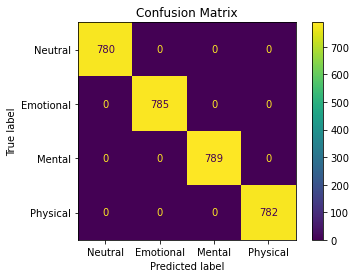

In [247]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    dtclf,
    X_Train,
    Y_Train,
    display_labels=Classes,
)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix

#### Score Functions on training data

In [248]:
print(metrics.classification_report(Y_Train, y_pred, target_names=Classes))

              precision    recall  f1-score   support

     Neutral       1.00      1.00      1.00       780
   Emotional       1.00      1.00      1.00       785
      Mental       1.00      1.00      1.00       789
    Physical       1.00      1.00      1.00       782

    accuracy                           1.00      3136
   macro avg       1.00      1.00      1.00      3136
weighted avg       1.00      1.00      1.00      3136



#### Accuracy for test data

In [249]:
y_pred = dtclf.predict(X_Test)
print("Accuracy:",metrics.accuracy_score(Y_Test, y_pred))

Accuracy: 0.9427083333333334


#### Confusion Matrix ( for test data )

array([[332,   2,   6,   0],
       [  5, 298,  31,   1],
       [  5,  16, 309,   1],
       [  0,   5,   5, 328]], dtype=int64)

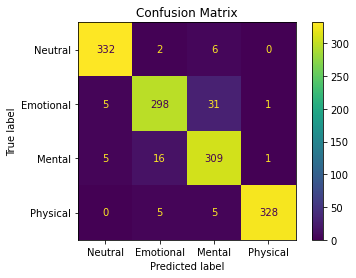

In [250]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    dtclf,
    X_Test,
    Y_Test,
    display_labels=Classes,
)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix

#### Score Functions on test data

In [251]:
print(metrics.classification_report(Y_Test, y_pred, target_names=Classes))

              precision    recall  f1-score   support

     Neutral       0.97      0.98      0.97       340
   Emotional       0.93      0.89      0.91       335
      Mental       0.88      0.93      0.91       331
    Physical       0.99      0.97      0.98       338

    accuracy                           0.94      1344
   macro avg       0.94      0.94      0.94      1344
weighted avg       0.94      0.94      0.94      1344



#### Draw Decision Tree

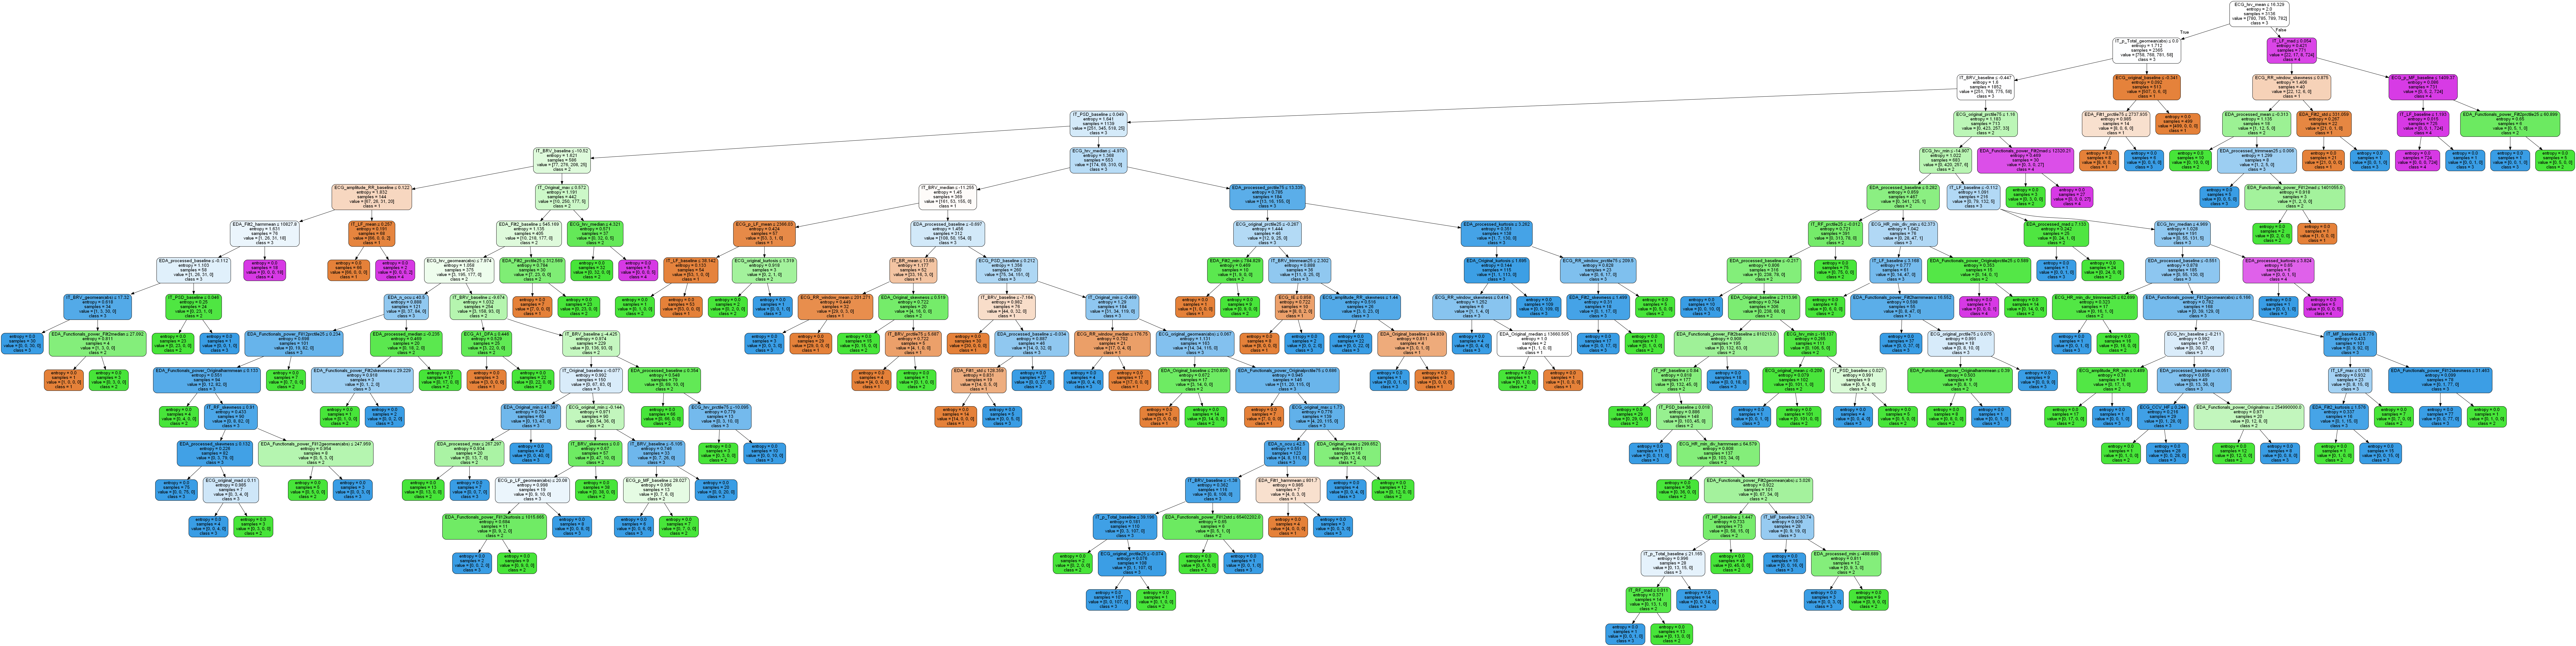

In [252]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtclf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = Labels[1:-1],class_names=['1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('test.png')
Image(graph.create_png())

#### 5-fold-cross-validation

In [253]:
kfcv = KFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(dtclf, X_Train, Y_Train, scoring='accuracy', cv=kfcv, n_jobs=-1)
print(np.mean(scores))

0.8960584727597801


<br><br><hr><br><br>

## Random forest classifier

In [232]:
#Create a Gaussian Classifier
rfclf=RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)

rfclf = rfclf.fit(X_Train,Y_Train)

#### Accuracy for training data

In [233]:
y_pred = rfclf.predict(X_Train)
print("Accuracy:",metrics.accuracy_score(Y_Train, y_pred))

Accuracy: 1.0


#### Confusion Matrix ( for train data )

array([[780,   0,   0,   0],
       [  0, 785,   0,   0],
       [  0,   0, 789,   0],
       [  0,   0,   0, 782]], dtype=int64)

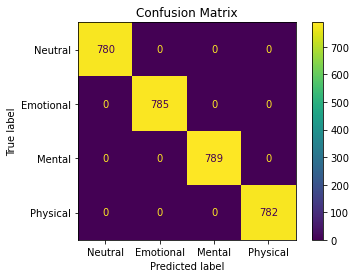

In [234]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    rfclf,
    X_Train,
    Y_Train,
    display_labels=Classes,
)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix

#### Score Functions on training data

In [235]:
print(metrics.classification_report(Y_Train, y_pred, target_names=Classes))

              precision    recall  f1-score   support

     Neutral       1.00      1.00      1.00       780
   Emotional       1.00      1.00      1.00       785
      Mental       1.00      1.00      1.00       789
    Physical       1.00      1.00      1.00       782

    accuracy                           1.00      3136
   macro avg       1.00      1.00      1.00      3136
weighted avg       1.00      1.00      1.00      3136



#### Accuracy for test data

In [236]:
y_pred = rfclf.predict(X_Test)
print("Accuracy:",metrics.accuracy_score(Y_Test, y_pred))

Accuracy: 0.9895833333333334


#### Confusion Matrix ( for test data )

array([[332,   2,   6,   0],
       [  0, 335,   0,   0],
       [  0,   5, 326,   0],
       [  0,   1,   0, 337]], dtype=int64)

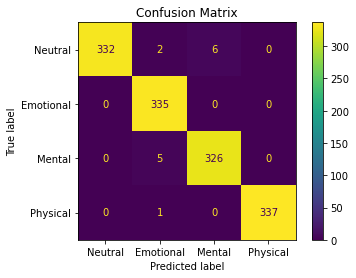

In [237]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    rfclf,
    X_Test,
    Y_Test,
    display_labels=Classes,
)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix

#### Score Functions on test data

In [238]:
print(metrics.classification_report(Y_Test, y_pred, target_names=Classes))

              precision    recall  f1-score   support

     Neutral       1.00      0.98      0.99       340
   Emotional       0.98      1.00      0.99       335
      Mental       0.98      0.98      0.98       331
    Physical       1.00      1.00      1.00       338

    accuracy                           0.99      1344
   macro avg       0.99      0.99      0.99      1344
weighted avg       0.99      0.99      0.99      1344



#### 5-fold-cross-validation

In [239]:
kfcv = KFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(rfclf, X_Train, Y_Train, scoring='accuracy', cv=kfcv, n_jobs=-1)
print(np.mean(scores))

0.9821473196598909


<br><br><hr><br><br>

## XGBoost classifier

In [167]:
xgbclf = xgb.XGBClassifier(objective="multi:softprob", random_state=0)
xgbclf.fit(X_Train.to_numpy(), Y_Train.to_numpy())

[13:28:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

#### Accuracy for  training data

In [177]:
y_pred = xgbclf.predict(X_Train.to_numpy())
print("Accuracy:",metrics.accuracy_score(Y_Train, y_pred))

Accuracy: 1.0


#### Confusion Matrix ( for train data )

array([[780,   0,   0,   0],
       [  0, 785,   0,   0],
       [  0,   0, 789,   0],
       [  0,   0,   0, 782]], dtype=int64)

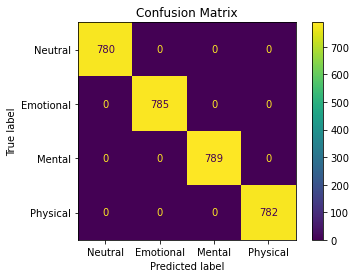

In [178]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    xgbclf,
    X_Train.to_numpy(),
    Y_Train.to_numpy(),
    display_labels=Classes,
)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix

#### Score Functions on training data

In [179]:
print(metrics.classification_report(Y_Train, y_pred, target_names=Classes))

              precision    recall  f1-score   support

     Neutral       1.00      1.00      1.00       780
   Emotional       1.00      1.00      1.00       785
      Mental       1.00      1.00      1.00       789
    Physical       1.00      1.00      1.00       782

    accuracy                           1.00      3136
   macro avg       1.00      1.00      1.00      3136
weighted avg       1.00      1.00      1.00      3136



#### Accuracy for test data

In [180]:
y_pred = xgbclf.predict(X_Test.to_numpy())
print("Accuracy:",metrics.accuracy_score(Y_Test, y_pred))

Accuracy: 0.9910714285714286


#### Confusion Matrix ( for test data )

array([[334,   3,   3,   0],
       [  0, 334,   1,   0],
       [  0,   2, 328,   1],
       [  0,   1,   1, 336]], dtype=int64)

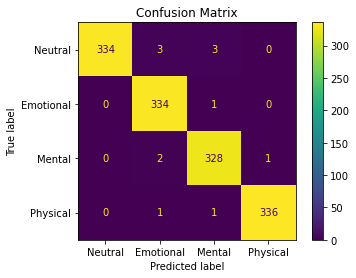

In [181]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    xgbclf,
    X_Test.to_numpy(),
    Y_Test.to_numpy(),
    display_labels=Classes,
)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix

#### Score Functions for test data

In [182]:
print(metrics.classification_report(Y_Test, y_pred, target_names=Classes))

              precision    recall  f1-score   support

     Neutral       1.00      0.98      0.99       340
   Emotional       0.98      1.00      0.99       335
      Mental       0.98      0.99      0.99       331
    Physical       1.00      0.99      1.00       338

    accuracy                           0.99      1344
   macro avg       0.99      0.99      0.99      1344
weighted avg       0.99      0.99      0.99      1344



#### 5-fold-cross-validation

In [183]:
kfcv = KFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(xgbclf, X_Train.to_numpy(), Y_Train.to_numpy(), scoring='accuracy', cv=kfcv, n_jobs=-1)
print(np.mean(scores))

0.9859694836396145


<br><br><hr><br><br>

## SVM Classification

In [276]:
svmclf = OneVsRestClassifier(svm.LinearSVC(random_state=0))
#svmclf = svm.SVC(kernel='rbf',random_state=0)
svmclf.fit(X_Train, Y_Train)


OneVsRestClassifier(estimator=LinearSVC(random_state=0))

#### Accuracy for training data

In [277]:
y_pred = svmclf.predict(X_Train)
print("Accuracy:",metrics.accuracy_score(Y_Train, y_pred))

Accuracy: 0.4221938775510204


#### Confusion Matrix ( for training data )

array([[494, 170,  80,  36],
       [382, 262,  92,  49],
       [252, 278,  78, 181],
       [ 43, 220,  29, 490]], dtype=int64)

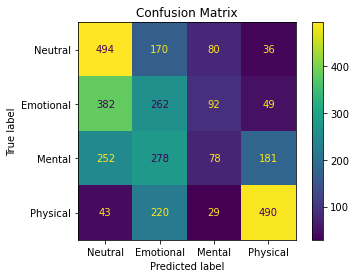

In [278]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    svmclf,
    X_Train,
    Y_Train,
    display_labels=Classes,
)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix

#### Score Functions on training data

In [279]:
print(metrics.classification_report(Y_Train, y_pred, target_names=Classes))

              precision    recall  f1-score   support

     Neutral       0.42      0.63      0.51       780
   Emotional       0.28      0.33      0.31       785
      Mental       0.28      0.10      0.15       789
    Physical       0.65      0.63      0.64       782

    accuracy                           0.42      3136
   macro avg       0.41      0.42      0.40      3136
weighted avg       0.41      0.42      0.40      3136



#### Accuracy for test data

In [280]:
y_pred = svmclf.predict(X_Test)
print("Accuracy:",metrics.accuracy_score(Y_Test, y_pred))

Accuracy: 0.42857142857142855


#### Confusion Matrix ( for test data )

array([[215,  73,  37,  15],
       [149, 120,  44,  22],
       [ 98, 122,  40,  71],
       [ 22, 101,  14, 201]], dtype=int64)

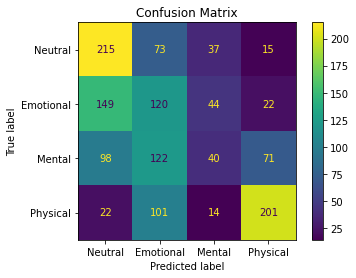

In [281]:
disp = metrics.ConfusionMatrixDisplay.from_estimator(
    svmclf,
    X_Test,
    Y_Test,
    display_labels=Classes,
)
disp.ax_.set_title('Confusion Matrix')
disp.confusion_matrix

#### Score Functions on test data

In [282]:
print(metrics.classification_report(Y_Test, y_pred, target_names=Classes))

              precision    recall  f1-score   support

     Neutral       0.44      0.63      0.52       340
   Emotional       0.29      0.36      0.32       335
      Mental       0.30      0.12      0.17       331
    Physical       0.65      0.59      0.62       338

    accuracy                           0.43      1344
   macro avg       0.42      0.43      0.41      1344
weighted avg       0.42      0.43      0.41      1344



#### 5-fold-cross-validation

In [283]:
kfcv = KFold(n_splits=5, random_state=0, shuffle=True)
scores = cross_val_score(svmclf, X_Train, Y_Train, scoring='accuracy', cv=kfcv, n_jobs=-1)
print(np.mean(scores))

0.353007954164508


# END.